In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import joblib


In [2]:
# Load dataset
df = pd.read_csv(r"C:\Users\Khan\Downloads\early+stage+diabetes+risk+prediction+dataset\diabetes_data_upload.csv")

In [3]:
 #
# Clean columns
df.columns = df.columns.str.strip()  # Remove spaces
print(df.columns.tolist())  # Debug column names


['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity', 'class']


In [4]:

# Fill missing 'Gender' if any
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [5]:
# Encode target first (before splitting)
df['class'] = df['class'].map({'Positive': 1, 'Negative': 0})



In [6]:
# Encode categorical features
le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0 (confirm if correct)

binary_columns = ['Polyuria', 'Polydipsia', 'weakness', 'Polyphagia',
                  'Itching', 'Irritability', 'Alopecia', 'Obesity']

for col in binary_columns:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

other_cat_columns = ['sudden weight loss', 'Genital thrush', 'visual blurring',
                     'delayed healing', 'partial paresis', 'muscle stiffness']

for col in other_cat_columns:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [7]:
# Ensure all columns are numeric
print(df.dtypes)

Age                   int64
Gender                int64
Polyuria              int64
Polydipsia            int64
sudden weight loss    int64
weakness              int64
Polyphagia            int64
Genital thrush        int64
visual blurring       int64
Itching               int64
Irritability          int64
delayed healing       int64
partial paresis       int64
muscle stiffness      int64
Alopecia              int64
Obesity               int64
class                 int64
dtype: object


In [8]:
# Separate features and target
X = df.drop(columns=['class'])
y = df['class']

In [9]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Handle any missing data (if necessary)
imputer = SimpleImputer(strategy='most_frequent')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X.columns)


In [11]:
# Train multiple models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', probability=True)
}

best_model = None
best_accuracy = 0

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.2f}")
    print(classification_report(y_test, y_pred))

    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model

Logistic Regression Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.93      0.96      0.94        71

    accuracy                           0.92       104
   macro avg       0.92      0.90      0.91       104
weighted avg       0.92      0.92      0.92       104

Random Forest Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.99      0.99        71

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104

SVM Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        33
           1       0.93      0.92      0.92        71

    accuracy                           0.89       104
   macro avg       0.88      0.88      0.88  

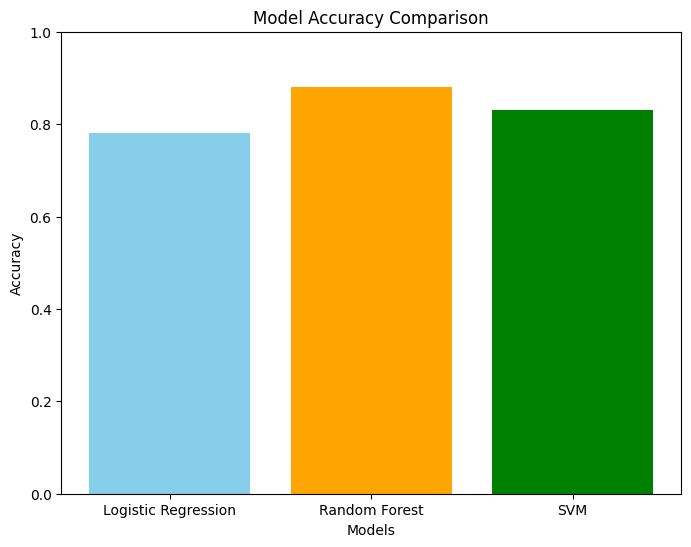

In [12]:
#Accuracy comparison chart
import matplotlib.pyplot as plt

# Example Accuracy Comparison Bar Chart
models = ['Logistic Regression', 'Random Forest', 'SVM']
accuracies = [0.78, 0.88, 0.83]  # Use your actual values here

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['skyblue', 'orange', 'green'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# Save the figure as a PNG file
plt.savefig('model_accuracy_comparison.png', dpi=300)  # dpi=300 for high quality

plt.show()


In [13]:
print(df.columns)


Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')


In [14]:
# Save the best model
joblib.dump(best_model, "best_diabetes_model.pkl")
print("Best model saved successfully.")

Best model saved successfully.


In [15]:
import pandas as pd
import numpy as np
import joblib

def predict_diabetes(input_data):
    model = joblib.load("best_diabetes_model.pkl")

    # Ensure input is a DataFrame with correct feature names
    if not isinstance(input_data, pd.DataFrame):
        feature_names = ['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
                         'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
                         'Itching', 'Irritability', 'delayed healing', 'partial paresis',
                         'muscle stiffness', 'Alopecia', 'Obesity']
        input_data = pd.DataFrame([input_data], columns=feature_names)  # Create DataFrame only if needed

    # Make prediction
    prediction = model.predict(input_data)

    return "Diabetic" if prediction[0] == 1 else "Non-Diabetic"

# Example Test Case
sample_input = [50, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0]  # Ensure 16 features
print("Prediction:", predict_diabetes(sample_input))



Prediction: Diabetic


In [16]:
print(X_train.columns)


Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')


In [17]:
import pandas as pd

# Define feature names (excluding the 'class' column)
feature_names = ['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
                 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
                 'Itching', 'Irritability', 'delayed healing', 'partial paresis',
                 'muscle stiffness', 'Alopecia', 'Obesity']

# Create a DataFrame with the correct column names
sample_df = pd.DataFrame([sample_input], columns=feature_names)

# Make the prediction
print("Prediction:", predict_diabetes(sample_df))


Prediction: Diabetic
